$$
{\max_{x\in X} f(x) =- \min_{x\in X} -f(x)}
$$

### Solving the Newsvendor problem via Determinisctic Equivalent Problem


### First Stage Problem
$
\begin{array}{rl}
\min_x & cx - \mathbb{E}[R(x, D)] ={\color{red}\mathbb{E}[cx-R(x, D)]}\\
\text{s.t} & x\geq0\\
\end{array}
$

### Second Stage Problem
$
\begin{array}{rrl}
R(x,d) = &\max_{y,z} & py + rz\\
& \text{s.t} & y\leq d\\
 && y+z\leq x\\
 && y,z\geq 0
\end{array}
$

### Second Stage Problem
$\begin{array}{rrrl}
Q(x,d)=&-R(x,d) = &\min_{y,z} & -py - rz\\
&& \text{s.t} & y\leq d\\
 &&& y+z\leq x\\
 &&& y,z\geq 0
\end{array}
$

### First Stage Problem
$\begin{array}{rl}
\min_x & \mathbb{E}[cx+Q(x, D)]\\
\text{s.t} & x\geq0\\
\end{array}
$

In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'gurobipy'

#### Writing the Deterministic equivalent problem


$$
\begin{array}{rl}
\min_{x,y_{w_i},z_{w_i}} & \mathbb{E}[cx - py_{w_i} - rz_{w_i}]={\color{red}\sum_i \mathbb{P}(w_i)[cx - py_{w_i} - rz_{w_i}]}\\
\text{s.t} & x\geq0\\
&\left.
\begin{array}{l}
 y_{w_i} \leq d_{w_i}\\
 y_{w_i}+z_{w_i}\leq x\\
  y_{w_i},z_{w_i}\geq 0
\end{array}\right\}\text{for } {w_1},{w_2}\ldots
\end{array}
$$


In [ ]:
c= 10
p=15
r= 2

In [11]:
## coding the determinic equivalent problem
tab = pd.read_excel('data/lognormal_sample.xlsx')
model = gp.Model()
x = model.addVar(lb=0, name='x') # first stage variable -- here and now variable
I = list(tab.index)
y = model.addVars(I, lb=0, name='y')# second stage variable -- wait and see variable
z = model.addVars(I, lb=0, name='z')# second stage variable -- wait and see variable

model.addConstrs( y[i] <= tab.loc[i, 'Sample'] for i in I)
model.addConstrs( y[i] + z[i] <= x for i in I)
obj = (1/len(I)) * gp.quicksum( c*x -p*y[i] - r*z[i] for i in I)
model.setObjective(obj, sense=gp.GRB.MINIMIZE)
model.update()

In [13]:
model.write('newsvendor.lp')

In [14]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2000 rows, 2001 columns and 4000 nonzeros
Model fingerprint: 0x6544669c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 1000 rows and 0 columns
Presolve time: 0.01s
Presolved: 1000 rows, 2001 columns, 3000 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.4982000e+31   2.390000e+32   5.992800e+01      0s
     439   -1.1457200e+02   0.000000e+00   0.000000e+00      0s

Use crossover to convert LP symmetric solution to basic solution...
Crossover log...

       0 PPushes remaining with PInf 0.0000000e+00                 0s

  Push phase complete: Pinf 0.0000000e+00, Dinf 0.0000000e+00      0s

Iteration    Objective       P

In [15]:
x.X

41.0

In [16]:
obj.getValue()

-114.57200000000132

In [18]:
for i in I:
    print('y_wi = {} ,  z_wi={}'.format(y[i].X, z[i].X))

y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 7.0 ,  z_wi=34.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 26.0 ,  z_wi=15.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 35.0 ,  z_wi=6.0
y_wi = 24.0 ,  z_wi=17.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 16.0 ,  z_wi=25.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 6.0 ,  z_wi=35.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 29.0 ,  z_wi=12.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 38.0 ,  z_wi=3.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 23.0 ,  z_wi=18.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 27.0 ,  z_wi=14.0
y_wi = 25.0 ,  z_wi=16.0
y_wi = 24.0 ,  z_wi=17.0
y_wi = 17.0 ,  z_wi=24.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 20.0 ,  z_wi=21.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi = 41.0 ,  z_wi=0.0
y_wi =

### computing the Expected value solution:  $D \Rightarrow \mathbb{E}[D]$

In [19]:
## coding the determinic equivalent problem

model = gp.Model()
x = model.addVar(lb=0, name='x') # first stage variable -- here and now variable
I = [0]
y = model.addVars(I, lb=0, name='y')# second stage variable -- wait and see variable
z = model.addVars(I, lb=0, name='z')# second stage variable -- wait and see variable

model.addConstrs( y[i] <= tab['Sample'].mean() for i in I)
model.addConstrs( y[i] + z[i] <= x for i in I)
obj = (1/len(I)) * gp.quicksum( c*x -p*y[i] - r*z[i] for i in I)
model.setObjective(obj, sense=gp.GRB.MINIMIZE)
model.update()

In [20]:
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 4 nonzeros
Model fingerprint: 0x523c1b32
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+01, 8e+01]
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.0691000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -4.069100000e+02


In [21]:
x.X

81.382

In [25]:
## coding the second stage problem
def R(x, d):
    model = gp.Model()
    y = model.addVar(lb=0)
    z= model.addVar(lb=0)
    model.addConstr( y <= d)
    model.addConstr( y + z <= x)
    obj = p*y + r*z
    model.setObjective(obj, sense=gp.GRB.MAXIMIZE)
    model.optimize()
    return obj.getValue(), y.X, z.X
    

In [30]:
# computing the Expected Vaule Distribution
EVS = 81.382
EVD = pd.Series([R(EVS, d)[0] - c*EVS for d in tab['Sample']])

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x2c32404a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 8e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.6076400e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  7.607640000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprin

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 8e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8376400e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.837640000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x11970722
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+01, 8e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Object

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0476400e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.047640000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x7612a326
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+01, 1e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2207300e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optima

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [31]:
# computing the distribution associated to the Risk neutral decision
RNS = 41.0
RND = pd.Series([R(RNS, d)[0] - c*RNS for d in tab['Sample']])

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x8817df26
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 5e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.1500000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.150000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprin

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Optimal objective  5.240000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x2f8974b9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 4e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.5900000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.590000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 colu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Model fingerprint: 0xe56616d8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 8e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.1500000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.150000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0xab0a99fe
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 3e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Pres

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [36]:
### Computing the WS solution with perfect information

## coding the determinic equivalent problem
tab = pd.read_excel('data/lognormal_sample.xlsx')
model = gp.Model()

I = list(tab.index)
x = model.addVars(I,lb=0, name='x') 
y = model.addVars(I, lb=0, name='y')# second stage variable -- wait and see variable
z = model.addVars(I, lb=0, name='z')# second stage variable -- wait and see variable

model.addConstrs( y[i] <= tab.loc[i, 'Sample'] for i in I)
model.addConstrs( y[i] + z[i] <= x[i] for i in I)
obj = (1/len(I)) * gp.quicksum( c*x[i] -p*y[i] - r*z[i] for i in I)
model.setObjective(obj, sense=gp.GRB.MINIMIZE)
model.update()
model.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2000 rows, 3000 columns and 4000 nonzeros
Model fingerprint: 0xff80f716
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 2000 rows and 3000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.0691000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -4.069100000e+02


In [40]:
## The WS solution is given by x, y, z
for i in I:
    print('x_wi = {} ,y_wi = {} ,  z_wi={}'.format(x[i].X, y[i].X, z[i].X))

x_wi = 46.0 ,y_wi = 46.0 ,  z_wi=0.0
x_wi = 52.0 ,y_wi = 52.0 ,  z_wi=0.0
x_wi = 79.0 ,y_wi = 79.0 ,  z_wi=0.0
x_wi = 42.0 ,y_wi = 42.0 ,  z_wi=0.0
x_wi = 7.0 ,y_wi = 7.0 ,  z_wi=0.0
x_wi = 50.0 ,y_wi = 50.0 ,  z_wi=0.0
x_wi = 83.0 ,y_wi = 83.0 ,  z_wi=0.0
x_wi = 26.0 ,y_wi = 26.0 ,  z_wi=0.0
x_wi = 70.0 ,y_wi = 70.0 ,  z_wi=0.0
x_wi = 192.0 ,y_wi = 192.0 ,  z_wi=0.0
x_wi = 361.0 ,y_wi = 361.0 ,  z_wi=0.0
x_wi = 82.0 ,y_wi = 82.0 ,  z_wi=0.0
x_wi = 53.0 ,y_wi = 53.0 ,  z_wi=0.0
x_wi = 80.0 ,y_wi = 80.0 ,  z_wi=0.0
x_wi = 35.0 ,y_wi = 35.0 ,  z_wi=0.0
x_wi = 24.0 ,y_wi = 24.0 ,  z_wi=0.0
x_wi = 780.0 ,y_wi = 780.0 ,  z_wi=0.0
x_wi = 16.0 ,y_wi = 16.0 ,  z_wi=0.0
x_wi = 91.0 ,y_wi = 91.0 ,  z_wi=0.0
x_wi = 79.0 ,y_wi = 79.0 ,  z_wi=0.0
x_wi = 6.0 ,y_wi = 6.0 ,  z_wi=0.0
x_wi = 41.0 ,y_wi = 41.0 ,  z_wi=0.0
x_wi = 264.0 ,y_wi = 264.0 ,  z_wi=0.0
x_wi = 66.0 ,y_wi = 66.0 ,  z_wi=0.0
x_wi = 29.0 ,y_wi = 29.0 ,  z_wi=0.0
x_wi = 110.0 ,y_wi = 110.0 ,  z_wi=0.0
x_wi = 49.0 ,y_wi = 49.0 ,  z_wi

In [43]:
PID = pd.Series([R(x[i].X, tab.loc[i,'Sample'])[0] - c*x[i].X for i in tab.index])

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0xc232a485
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 5e+01]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.9000000e+02   0.000000e+00   2.000000e+00      0s
Extra simplex iterations after uncrush: 1
       1    6.9000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.900000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4250000e+03   0.000000e+00   2.000000e+00      0s
Extra simplex iterations after uncrush: 1
       1    1.4250000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.425000000e+03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0x27090b58
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+01]
Presolve re

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.450000000e+02
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.2.0 23C64)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 3 nonzeros
Model fingerprint: 0xa9703228
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2050000e+03   0.000000e+00   2.000000e+00      0s
Extra simplex iterations after uncrush: 1
       1    2.2050000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.205000000e+03
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac6

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



<Axes: ylabel='Frequency'>

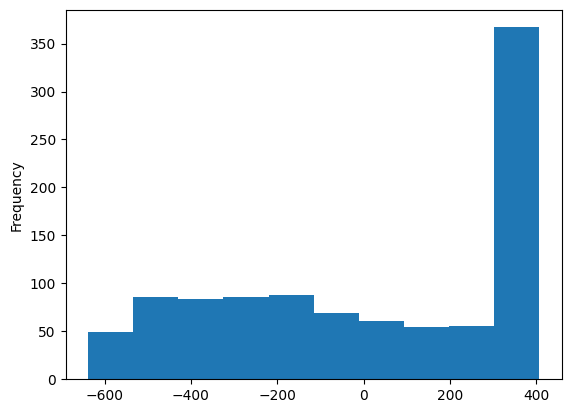

In [45]:
EVD.plot(kind='hist')

<Axes: ylabel='Frequency'>

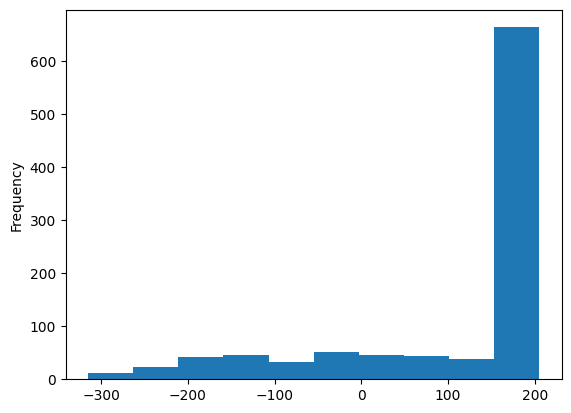

In [46]:
RND.plot(kind='hist')

<Axes: ylabel='Frequency'>

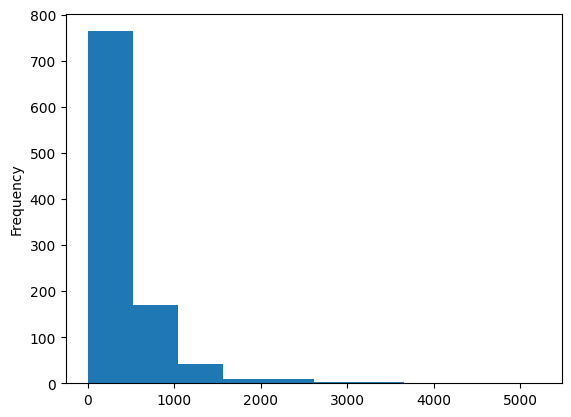

In [47]:
PID.plot(kind='hist')

In [49]:
VSS = RND.mean() - EVD.mean() # the value of the stochastic solution
print(VSS)

83.97718600000005


In [51]:
PIV = PID.mean() - RND.mean()  # the value of the Perfect Information
print(PIV)

292.338
